/home/mobius/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


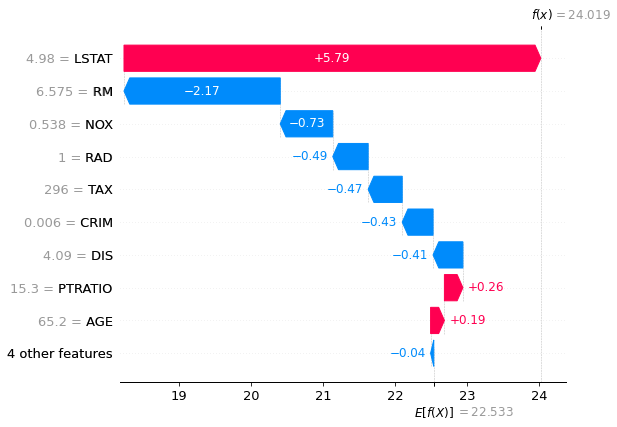

In [1]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [2]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import random 
import gc
%matplotlib inline 


from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GroupKFold, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import shap
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 600)


def set_seed(seed=2021):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [5]:
data  = X.copy()
data['target'] = y


In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
train, test = train_test_split(data, test_size=.15, random_state=42)
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
104,0.13960,0.0,8.56,0.0,0.5200,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
381,15.87440,0.0,18.10,0.0,0.6710,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08,10.9
489,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
69,0.12816,12.5,6.07,0.0,0.4090,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
408,7.40389,0.0,18.10,0.0,0.5970,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40,17.2
255,0.03548,80.0,3.64,0.0,0.3920,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
392,11.57790,0.0,18.10,0.0,0.7000,5.036,97.0,1.7700,24.0,666.0,20.2,396.90,25.68,9.7
312,0.26169,0.0,9.90,0.0,0.5440,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72,19.4
234,0.44791,0.0,6.20,1.0,0.5070,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05,29.0


In [8]:
target = train.pop('target')
target_tst = test.pop('target')
train.shape, target.shape, test.shape, target_tst.shape

((430, 13), (430,), (76, 13), (76,))

In [33]:
xgb_params = {
    
    'objective':'reg:squarederror', 
    'max_depth': 7, 
    'learning_rate': 0.01, 
    'booster':'gbtree', 
    'eval_metric': 'rmse', 
    'max_leaves': 7, 
    'colsample_bytree': 0.7, #feature fraction
    'subsample':0.9, # bagging fraction
    'lambda': 3, 
    'alpha': 3, 
  
   
}


xgb_scores = []
s2 = []
oof_xgb = np.zeros(len(train))
pred_xgb = np.zeros(len(test))

importances = pd.DataFrame()


folds = KFold(n_splits=5, shuffle=True, random_state=4242)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train, target)):
    print('fold : ----------------------------------------', fold_)
    trn_data = xgb.DMatrix(data=train.iloc[train_ind], label=target.iloc[train_ind])
    val_data = xgb.DMatrix(data= train.iloc[val_ind], label=target.iloc[val_ind])
    
       
    xgb_model = xgb.train(xgb_params, trn_data, num_boost_round=4000, evals=[(trn_data, 'train'), (val_data, 'test')], verbose_eval=200, early_stopping_rounds=100)
    oof_xgb[val_ind] = xgb_model.predict(xgb.DMatrix(train.iloc[val_ind]),  ntree_limit= xgb_model.best_ntree_limit)
    
    print(mean_absolute_error(target.iloc[val_ind], oof_xgb[val_ind]))
    xgb_scores.append(mean_absolute_error(target.iloc[val_ind], oof_xgb[val_ind]))
    #oof_xgb[val_ind] = np.where(oof_xgb[val_ind] >= 0.5, 1, 0)
    #s2.append(accuracy_score(target.iloc[val_ind], oof_xgb[val_ind]))
    importance_score = xgb_model.get_score(importance_type='gain')
    importance_frame = pd.DataFrame({'Importance': list(importance_score.values()), 'Feature': list(importance_score.keys())})
    importance_frame['fold'] = fold_ +1
    importances = pd.concat([importances, importance_frame], axis=0, sort=False)
    
    pred_xgb += xgb_model.predict(xgb.DMatrix(test), ntree_limit= xgb_model.best_ntree_limit)/folds.n_splits
    
print('model mae:------------------>', np.mean(xgb_scores))
#print('model accuracy:------------------>', np.mean(s2))

fold : ---------------------------------------- 0
[0]	train-rmse:23.68486	test-rmse:24.57363
[200]	train-rmse:4.91164	test-rmse:5.56266
[400]	train-rmse:1.94579	test-rmse:3.27285
[600]	train-rmse:1.18639	test-rmse:2.96623
[800]	train-rmse:0.85191	test-rmse:2.89420
[1000]	train-rmse:0.66622	test-rmse:2.86956
[1200]	train-rmse:0.55310	test-rmse:2.85738
[1400]	train-rmse:0.48346	test-rmse:2.85099
[1600]	train-rmse:0.43538	test-rmse:2.84739
[1800]	train-rmse:0.40236	test-rmse:2.84531
[1852]	train-rmse:0.39529	test-rmse:2.84557
2.0578349379606022
fold : ---------------------------------------- 1
[0]	train-rmse:24.16666	test-rmse:22.60698
[200]	train-rmse:4.95652	test-rmse:4.63783
[400]	train-rmse:1.95827	test-rmse:3.15176
[586]	train-rmse:1.23419	test-rmse:3.10788
2.065593903563743
fold : ---------------------------------------- 2
[0]	train-rmse:23.53008	test-rmse:25.15337
[200]	train-rmse:4.88290	test-rmse:6.15394
[400]	train-rmse:1.97844	test-rmse:4.03981
[600]	train-rmse:1.24673	test-rms

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

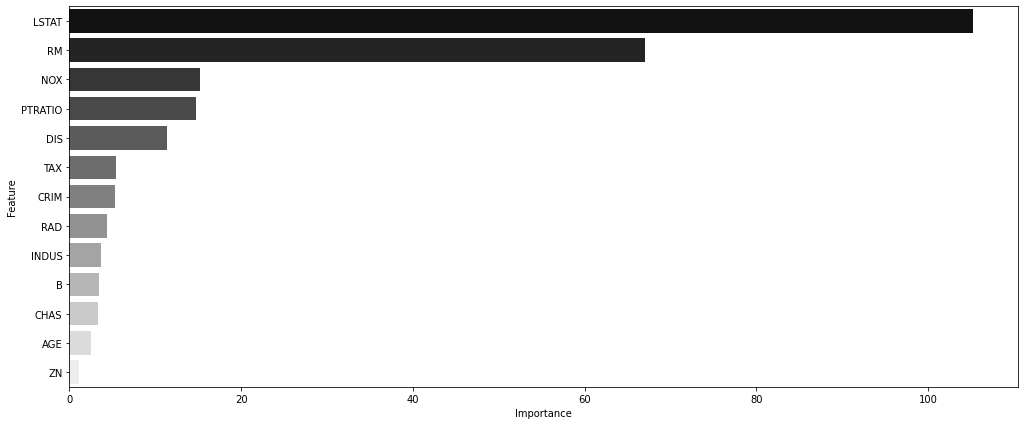

In [34]:
mean_gain = importances[['Importance', 'Feature']].groupby('Feature').mean()
#importances['mean_score'] = importances['Feature'].map(mean_gain['Importance'])
mean_gain = mean_gain.reset_index()
plt.figure(figsize=(17, 7))
sns.barplot(x='Importance', y='Feature', data=mean_gain.sort_values('Importance', ascending=False).head(50), palette='gist_gray')

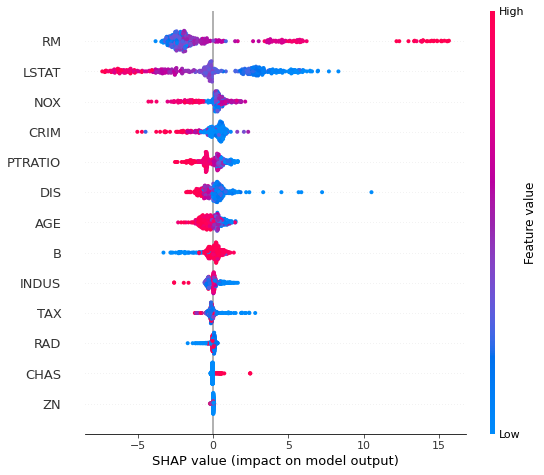

In [35]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(train)

shap.summary_plot(shap_values, train) 

In [10]:
from sklearn.metrics import *
xgb_params = {'objective': 'reg:squarederror', 
              'learning_rate': 0.02, 
              'booster' : "gbtree",
              'max_depth': 7, 
              
              'subsample': 0.85,# bagging_fraction in lgb
              'colsample_bytree': 0.9, # feature_fraction in lgb
              'colsample_bylevel' : 0.9,
              
              'min_child_weight':15,
              'alpha':0.03,
              'lambda': 0.8,
              'gamma' : 0,
              
              'eval_metric': 'rmse', 
              'nthread': 4}






folds = KFold(n_splits=5, shuffle=True, random_state=420)
oof_xgb = np.zeros(len(train))
pred_xgb = np.zeros(len(test))
scores = []
importances = pd.DataFrame()
#feature_importances['feature'] = train.columns

for fold_, (train_ind, val_ind) in enumerate(folds.split(train, target)):
    print(fold_)
    train_data= xgb.DMatrix(data=train.iloc[train_ind], label=target.iloc[train_ind])
    val_data = xgb.DMatrix(data=train.iloc[val_ind], label= target.iloc[val_ind])
    
    #trn_data = xgb.DMatrix(data=train.iloc[trn_idx][feats], label=target.iloc[trn_idx])
    #val_data = xgb.DMatrix(data=train.iloc[val_idx][feats], label=target.iloc[val_idx])
    
    watchlist = [(train_data, 'train'), (val_data, 'valid')]
    num_round = 3000
    xgb_model = xgb.train(xgb_params, train_data, num_round, watchlist, early_stopping_rounds=100,verbose_eval=100 )
    oof_xgb[val_ind] = xgb_model.predict(xgb.DMatrix(train.iloc[val_ind]), ntree_limit=xgb_model.best_ntree_limit)
    
    #feature_importances['fold_{}'.format(fold_ + 1)] = xgb_model.get_fscore().items()#(importance_type="gain")
                                        
    pred_xgb += xgb_model.predict(xgb.DMatrix(test), ntree_limit=xgb_model.best_ntree_limit) / folds.n_splits
    print('score rmse', fold_, np.sqrt(mean_squared_error(target.iloc[val_ind], oof_xgb[val_ind])))
    scores.append(np.sqrt(mean_squared_error(target.iloc[val_ind], oof_xgb[val_ind])))
    print('='*100)
    
    
    importance_score = xgb_model.get_score(importance_type='gain')
    importance_frame = pd.DataFrame({'Importance': list(importance_score.values()), 'Feature': list(importance_score.keys())})
    importance_frame['fold'] = fold_ +1
    importances = pd.concat([importances, importance_frame], axis=0, sort=False)
print('============Results ==============')
print('score mean:', np.mean(scores))
np.sqrt(mean_squared_error(target, oof_xgb))


0
[0]	train-rmse:23.48777	valid-rmse:24.19897
[100]	train-rmse:4.55721	valid-rmse:5.69713
[200]	train-rmse:2.45145	valid-rmse:4.04338
[300]	train-rmse:1.96700	valid-rmse:3.88049
[400]	train-rmse:1.66114	valid-rmse:3.83672
[500]	train-rmse:1.44099	valid-rmse:3.79307
[600]	train-rmse:1.26861	valid-rmse:3.78796
[700]	train-rmse:1.13369	valid-rmse:3.78140
[800]	train-rmse:1.01485	valid-rmse:3.77524
[899]	train-rmse:0.91682	valid-rmse:3.78734
score rmse 0 3.775244914669029
1
[0]	train-rmse:23.61998	valid-rmse:23.67070
[100]	train-rmse:4.60550	valid-rmse:5.36288
[200]	train-rmse:2.49245	valid-rmse:3.80498
[300]	train-rmse:2.02475	valid-rmse:3.57816
[400]	train-rmse:1.72637	valid-rmse:3.49986
[500]	train-rmse:1.48599	valid-rmse:3.43828
[600]	train-rmse:1.30092	valid-rmse:3.40410
[700]	train-rmse:1.14307	valid-rmse:3.38986
[800]	train-rmse:1.02293	valid-rmse:3.37026
[890]	train-rmse:0.91780	valid-rmse:3.37255
score rmse 1 3.369061348634469
2
[0]	train-rmse:23.29238	valid-rmse:24.89496
[100]	tr

3.4749856707778033

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

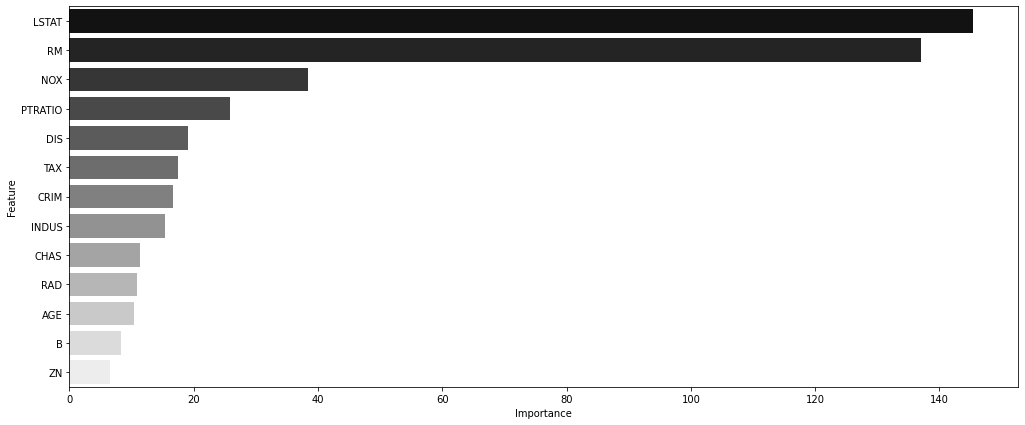

In [11]:
mean_gain = importances[['Importance', 'Feature']].groupby('Feature').mean()
#importances['mean_score'] = importances['Feature'].map(mean_gain['Importance'])
mean_gain = mean_gain.reset_index()
plt.figure(figsize=(17, 7))
sns.barplot(x='Importance', y='Feature', data=mean_gain.sort_values('Importance', ascending=False).head(50), palette='gist_gray')

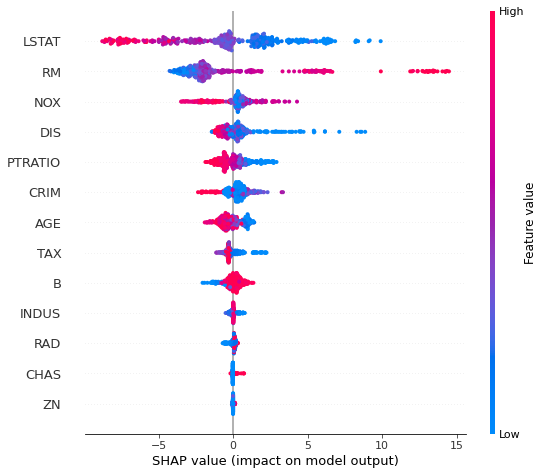

In [12]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(train)

shap.summary_plot(shap_values, train) 

In [39]:
shap.plots.force(shap_values[0])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [3]:
shap.initjs() 
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], test.iloc[0,:])

NameError: name 'shap' is not defined

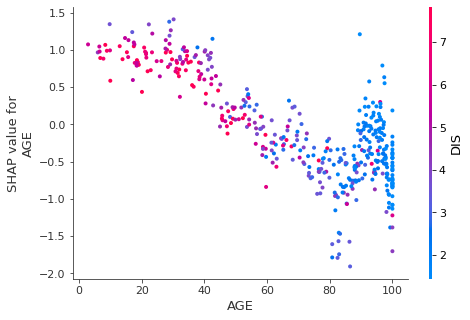

In [14]:
shap.dependence_plot("AGE", shap_values, train)

In [2]:
shap.dependence_plot("LSTAT", shap_values, train)

NameError: name 'shap' is not defined

In [1]:
shap.plots.text(shap_values[2])

NameError: name 'shap' is not defined